#Data Preparation

## Required Inputs

In [1]:
import numpy as np
import pandas as pd
import math
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import random

In [2]:
#Mount Data From Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Read Data

In [3]:
#Mount Data From Drive
AC_df=pd.read_csv('gdrive/My Drive/Colab Notebooks/LAMP/00_df_raw_AC.csv')
MC_df=pd.read_csv('gdrive/My Drive/Colab Notebooks/LAMP/00_df_raw_MC.csv')

#Simple Machine Learning Algorithm

##Imports

In [4]:
#Importing Libraries
import numpy as np
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GroupKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#from sklearn.externals import joblib
save_df = pd.read_csv('gdrive/My Drive/Colab Notebooks/LAMP/output.csv')


## Read Data In

In [5]:
factor = pd.factorize(save_df['target'])
save_df['target'] = factor[0]
definitions = factor[1]
print(save_df.target.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64
Index(['ad', 'ia', 'ib', 'kp', 'c19'], dtype='object')


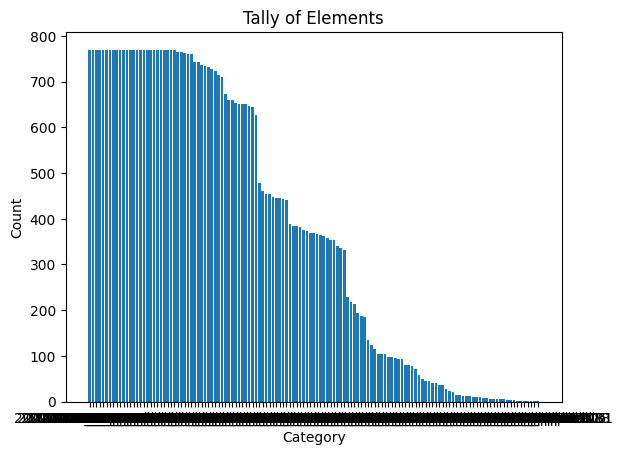

In [6]:
#seems to be a total of 133 experiments
tally = save_df["group_ID"].value_counts()
plt.bar(tally.index, tally.values)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Tally of Elements')

# Display the plot
plt.show()

In [7]:
#this is for getting the experiment ID only
#save_df['group_ID'] = [i[:11] for i in save_df['group_ID']]

## 5 param only

In [8]:
import random

def split_list_randomly(input_list, ratios):
    random.shuffle(input_list)
    split_indices = [0]
    cumulative_ratio = 0

    for ratio in ratios:
        cumulative_ratio += ratio
        split_index = int(len(input_list) * cumulative_ratio)
        split_indices.append(split_index)

    split_lists = [input_list[split_indices[i]:split_indices[i+1]] for i in range(len(split_indices)-1)]
    return split_lists

In [9]:
df = save_df

unique_elements = df['group_ID'].unique().tolist()

train_ratio = 0.8
test_ratio = 0.2

split = split_list_randomly(unique_elements, [train_ratio,test_ratio])

train_df = df[df['group_ID'].isin(split[0])]
test_df = df[df['group_ID'].isin(split[1])]

unique_elements = train_df['group_ID'].unique().tolist()

split = split_list_randomly(unique_elements, [0.2,0.2,0.2,0.2,0.2])
df_sub0 = train_df[train_df['group_ID'].isin(split[0])]
df_sub1 = train_df[train_df['group_ID'].isin(split[1])]
df_sub2 = train_df[train_df['group_ID'].isin(split[2])]
df_sub3 = train_df[train_df['group_ID'].isin(split[3])]
df_sub4 = train_df[train_df['group_ID'].isin(split[4])]

In [10]:
def check_overlap(df1, df2, common_column):
    merged = pd.merge(df1, df2, on=common_column, how='inner')
    return not merged.empty

# Example usage
data1 = pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0']
data2 = df_sub0["Unnamed: 0"]
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

overlap = check_overlap(df1, df2, "Unnamed: 0")
print(overlap)

False


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,3:8].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,3:8].values
y_test = test_df.iloc[:,2].values

rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    # (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    # (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    # (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf_classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = rf_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

rf_acc = test_accuracy

Cross-validation scores: [0.9362081254454739, 0.931463782696177]
Mean accuracy: 0.93
Confusion Matrix:
[[   1    0    0    0    0]
 [  19  805    1    4    7]
 [   9   45 3750   28   12]
 [  71   64   25 1882   86]
 [  38   86    6   44  969]]
Test Accuracy: 0.93


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,3:8].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,3:8].values
y_test = test_df.iloc[:,2].values

knn_classifier = KNeighborsClassifier()

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = knn_classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = knn_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

knn_acc = test_accuracy

Cross-validation scores: [0.8696840104537895, 0.8543762575452716, 0.9016890866794781, 0.9033786882739643, 0.8939413852017348]
Mean accuracy: 0.88
Confusion Matrix:
[[1809   29    5  100   32]
 [ 244 3471   47   18   34]
 [   8   10  764    8    1]
 [ 148   33    7  744   77]
 [   1    1    1    3   14]]
Test Accuracy: 0.89


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,3:8].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,3:8].values
y_test = test_df.iloc[:,2].values

classifier = SGDClassifier(loss='log_loss', penalty='l1', alpha = 1.e-04,  l1_ratio = 1., max_iter = 1000, n_jobs=-1)

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

sgd_acc = test_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Cross-validation scores: [0.705511998099311, 0.6322937625754527, 0.6921209669262668, 0.6966824644549763, 0.7838086476540939]
Mean accuracy: 0.70
Confusion Matrix:
[[1903   50    0    0   22]
 [ 883 2756  170    5    0]
 [  31   38  713    3    6]
 [ 319   44    5  586   55]
 [   8    0    0    6    6]]
Test Accuracy: 0.78


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,3:8].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,3:8].values
y_test = test_df.iloc[:,2].values

classifier =  RidgeClassifier(alpha = 1.e-04, max_iter = 200)

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

LR_L2_acc = test_accuracy

Cross-validation scores: [0.656688049417914, 0.6481388329979879, 0.7033478304844746, 0.7319981654181318, 0.7230910763569457]
Mean accuracy: 0.69
Confusion Matrix:
[[1864   97    8    6    0]
 [ 982 2351  467   12    2]
 [   0   13  774    4    0]
 [  98   83  302  511   15]
 [   5    0    3   10    2]]
Test Accuracy: 0.72


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,3:8].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,3:8].values
y_test = test_df.iloc[:,2].values

classifier = SGDClassifier(loss='log_loss', penalty='elasticnet', alpha=1.e-04, l1_ratio=0.5, max_iter=1000, n_jobs=-1)

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

LR_L1_L2_acc = test_accuracy

Cross-validation scores: [0.656688049417914, 0.6481388329979879, 0.7033478304844746, 0.7319981654181318, 0.7230910763569457]
Mean accuracy: 0.69
Confusion Matrix:
[[1864   97    8    6    0]
 [ 982 2351  467   12    2]
 [   0   13  774    4    0]
 [  98   83  302  511   15]
 [   5    0    3   10    2]]
Test Accuracy: 0.72


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,3:8].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,3:8].values
y_test = test_df.iloc[:,2].values

classifier =  SGDClassifier(loss = 'hinge', alpha = 0.1,  l1_ratio = 1, max_iter = 200, n_jobs=-1)

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

SGD_acc = test_accuracy

Cross-validation scores: [0.396056070325493, 0.0778420523138833, 0.26711843835339333, 0.5262192325332518, 0.41858325666973323]
Mean accuracy: 0.34
Confusion Matrix:
[[1793   76  105    0    1]
 [ 551  624 2639    0    0]
 [  33   22  730    0    6]
 [ 574   12  384   38    1]
 [  18    1    1    0    0]]
Test Accuracy: 0.42


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,3:8].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,3:8].values
y_test = test_df.iloc[:,2].values

classifier =  HistGradientBoostingClassifier(
                                    learning_rate = 0.01,
                                    min_samples_leaf =8,
                                    max_leaf_nodes = 4)

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

GBT_acc = test_accuracy

Cross-validation scores: [0.7798764552150155, 0.7222082494969819, 0.8898553656316375, 0.8194465678030882, 0.843737679064266]
Mean accuracy: 0.81
Confusion Matrix:
[[1916   23    0    0   36]
 [ 410 3256  130   18    0]
 [   2   23  744   12   10]
 [ 199  182   19  493  116]
 [   6    2    1    0   11]]
Test Accuracy: 0.84


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,3:8].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,3:8].values
y_test = test_df.iloc[:,2].values

classifier =  SVC(C = 1.e-07, kernel = 'linear', max_iter = 200, probability = True)

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

SVM_acc = test_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

Cross-validation scores: [0.3820384889522452, 0.647258551307847, 0.3476281986446849, 0.4254701116037303, 0.2746747272966224]
Mean accuracy: 0.42
Confusion Matrix:
[[ 993    0  110  459  413]
 [ 504    0 2791  328  191]
 [   0    0  761   12   18]
 [   6    0  323  323  357]
 [   3    0    2    2   13]]
Test Accuracy: 0.27


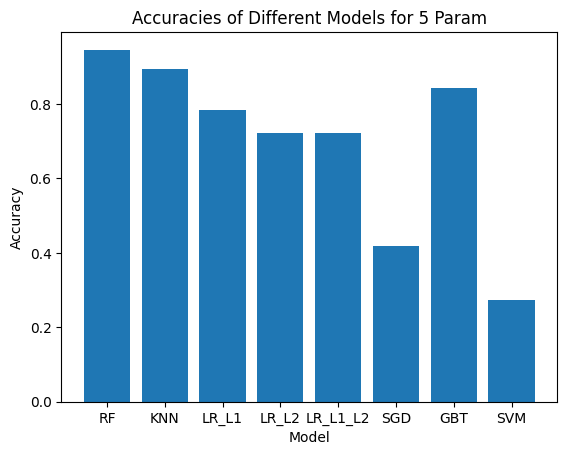

In [19]:
import matplotlib.pyplot as plt

# Define the model names and their corresponding accuracies
model_names = ['RF', 'KNN', 'LR_L1','LR_L2','LR_L1_L2','SGD','GBT','SVM']
accuracies = [rf_acc,knn_acc,sgd_acc,LR_L2_acc,LR_L1_L2_acc,SGD_acc,GBT_acc,SVM_acc]

# Create a bar chart
plt.bar(model_names, accuracies)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracies of Different Models for 5 Param')

# Show the plot
plt.show()

## ac only

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,8:43].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,8:43].values
y_test = test_df.iloc[:,2].values

rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    # (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    # (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    # (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf_classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = rf_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

rf_acc_ac = test_accuracy

Cross-validation scores: [0.9000950344499882, 0.9253018108651911]
Mean accuracy: 0.91
Confusion Matrix:
[[   1    0    0    0    0]
 [  76  742    0    2   16]
 [   1   29 3790   18    6]
 [  25   57   17 1921  108]
 [  62   32   44  101  904]]
Test Accuracy: 0.93


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,8:43].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,8:43].values
y_test = test_df.iloc[:,2].values

knn_classifier = KNeighborsClassifier()

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = knn_classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = knn_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

knn_acc_ac = test_accuracy

Cross-validation scores: [0.8998574483250178, 0.9104627766599598, 0.9541822595327197, 0.9509249350252255, 0.9290314101721645]
Mean accuracy: 0.93
Confusion Matrix:
[[1944   31    0    0    0]
 [  52 3665   20   30   47]
 [   4   15  761    9    2]
 [ 199   55    4  688   63]
 [   1    2    0    6   11]]
Test Accuracy: 0.93


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,8:43].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,8:43].values
y_test = test_df.iloc[:,2].values

classifier = SGDClassifier(loss='log_loss', penalty='l1', alpha = 1.e-04,  l1_ratio = 1., max_iter = 1000, n_jobs=-1)

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

sgd_acc_ac = test_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Cross-validation scores: [0.5942028985507246, 0.443158953722334, 0.7983210276120157, 0.6032716709983184, 0.6225522407675121]
Mean accuracy: 0.61
Confusion Matrix:
[[1804   42    0   17  112]
 [ 835 2851   18   18   92]
 [   3  441   37  288   22]
 [ 346   75    2   33  553]
 [   8    0    0    0   12]]
Test Accuracy: 0.62


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,8:43].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,8:43].values
y_test = test_df.iloc[:,2].values

classifier =  RidgeClassifier(alpha = 1.e-04, max_iter = 200)

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

LR_L2_acc_ac = test_accuracy

Cross-validation scores: [0.6462342599192207, 0.48214285714285715, 0.7926570243754425, 0.6370585537379606, 0.6705217505585491]
Mean accuracy: 0.65
Confusion Matrix:
[[1900   30    4   16   25]
 [ 874 2826   94   14    6]
 [  46  440  228   74    3]
 [ 409  131   17  145  307]
 [  17    0    0    0    3]]
Test Accuracy: 0.67


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,8:43].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,8:43].values
y_test = test_df.iloc[:,2].values

classifier = SGDClassifier(loss='log_loss', penalty='elasticnet', alpha=1.e-04, l1_ratio=0.5, max_iter=1000, n_jobs=-1)

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

LR_L1_L2_acc_ac = test_accuracy

Cross-validation scores: [0.6462342599192207, 0.48214285714285715, 0.7926570243754425, 0.6370585537379606, 0.6705217505585491]
Mean accuracy: 0.65
Confusion Matrix:
[[1900   30    4   16   25]
 [ 874 2826   94   14    6]
 [  46  440  228   74    3]
 [ 409  131   17  145  307]
 [  17    0    0    0    3]]
Test Accuracy: 0.67


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,8:43].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,8:43].values
y_test = test_df.iloc[:,2].values

classifier =  SGDClassifier(loss = 'hinge', alpha = 0.1,  l1_ratio = 1, max_iter = 200, n_jobs=-1)

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

SGD_acc_ac = test_accuracy

Cross-validation scores: [0.49406034687574246, 0.3016851106639839, 0.5117831495903712, 0.5197981959944963, 0.5097910369299514]
Mean accuracy: 0.47
Confusion Matrix:
[[1946   23    0    6    0]
 [ 999 1283 1528    4    0]
 [  25   20  644  102    0]
 [ 933   67    0    6    3]
 [  20    0    0    0    0]]
Test Accuracy: 0.51


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,8:43].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,8:43].values
y_test = test_df.iloc[:,2].values

classifier =  HistGradientBoostingClassifier(
                                    learning_rate = 0.01,
                                    min_samples_leaf =8,
                                    max_leaf_nodes = 4)

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

GBT_acc_ac = test_accuracy

Cross-validation scores: [0.800784034212402, 0.7584255533199196, 0.8432284818448468, 0.8166946950007644, 0.8196872125114996]
Mean accuracy: 0.81
Confusion Matrix:
[[1888   73    2    0   12]
 [ 177 3342  173  116    6]
 [   3  177  543   48   20]
 [ 182  248   68  464   47]
 [   3    8    0    9    0]]
Test Accuracy: 0.82


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,8:43].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,8:43].values
y_test = test_df.iloc[:,2].values

classifier =  SVC(C = 1.e-07, kernel = 'linear', max_iter = 200, probability = True)

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

SVM_acc_ac = test_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

Cross-validation scores: [0.25706818721786645, 0.2130281690140845, 0.0556286032163447, 0.0892829842531723, 0.018530687343934815]
Mean accuracy: 0.13
Confusion Matrix:
[[  62  284   59   23 1547]
 [2503    8   54  409  840]
 [ 257    0    8  457   69]
 [  61    3  241   56  648]
 [   0    2   11    0    7]]
Test Accuracy: 0.02


## 5 param + AC
---



Cross-validation scores: [0.9369208838203849]
Mean accuracy: 0.94
Confusion Matrix:
[[1655    8    0    0   28]
 [  26 2190   42   12    2]
 [   2   11 1596   25    0]
 [   3   33    5 1644   93]
 [  65   64    6  106  802]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1691
           1       0.95      0.96      0.96      2272
           2       0.97      0.98      0.97      1634
           3       0.92      0.92      0.92      1778
           4       0.87      0.77      0.82      1043

    accuracy                           0.94      8418
   macro avg       0.93      0.92      0.93      8418
weighted avg       0.94      0.94      0.94      8418



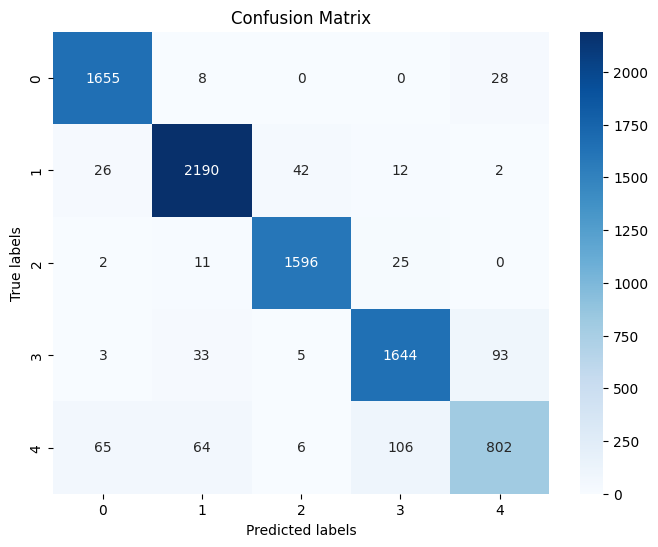

Test Accuracy: 0.94


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,3:43].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,3:43].values
y_test = test_df.iloc[:,2].values

rf_classifier = RandomForestClassifier(n_estimators=15, criterion='entropy', random_state=31)

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    # (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    # (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    # (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    # (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf_classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = rf_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix as an image
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

print("Test Accuracy: %.2f" % test_accuracy)

rf_acc_all = test_accuracy


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,3:43].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,3:43].values
y_test = test_df.iloc[:,2].values

knn_classifier = KNeighborsClassifier()

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = knn_classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = knn_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

knn_acc_all = test_accuracy

Cross-validation scores: [0.875623663578047, 0.8644366197183099, 0.9361788206736118, 0.9269224889160679, 0.9049809436193981]
Mean accuracy: 0.90
Confusion Matrix:
[[1941   16    0   10    8]
 [ 141 3627   15   27    4]
 [   4   34  747    2    4]
 [ 261   32    3  561  152]
 [   5    1    0    4   10]]
Test Accuracy: 0.90


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,3:43].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,3:43].values
y_test = test_df.iloc[:,2].values

classifier = SGDClassifier(loss='log_loss', penalty='l1', alpha = 1.e-04,  l1_ratio = 1., max_iter = 1000, n_jobs=-1)

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

sgd_acc_all = test_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Cross-validation scores: [0.7697790449037776, 0.7364185110663984, 0.9020936583392334, 0.766702339091882, 0.764489420423183]
Mean accuracy: 0.79
Confusion Matrix:
[[1921   33    2    0   19]
 [ 512 3198   85   14    5]
 [   0  203  576   11    1]
 [ 267   18   65  107  552]
 [   4    0    1    0   15]]
Test Accuracy: 0.76


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,3:43].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,3:43].values
y_test = test_df.iloc[:,2].values

classifier =  RidgeClassifier(alpha = 1.e-04, max_iter = 200)

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

LR_L2_acc_all = test_accuracy

Cross-validation scores: [0.7512473271560941, 0.6693913480885312, 0.8722564984322848, 0.7740406665647455, 0.7760546720988303]
Mean accuracy: 0.77
Confusion Matrix:
[[1952   23    0    0    0]
 [ 635 3052  121    6    0]
 [   0  304  482    5    0]
 [ 122  117   60  412  298]
 [  12    0    1    0    7]]
Test Accuracy: 0.78


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,3:43].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,3:43].values
y_test = test_df.iloc[:,2].values

classifier = SGDClassifier(loss='log_loss', penalty='elasticnet', alpha=1.e-04, l1_ratio=0.5, max_iter=1000, n_jobs=-1)

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

LR_L1_L2_acc_all = test_accuracy

Cross-validation scores: [0.7512473271560941, 0.6693913480885312, 0.8722564984322848, 0.7740406665647455, 0.7760546720988303]
Mean accuracy: 0.77
Confusion Matrix:
[[1952   23    0    0    0]
 [ 635 3052  121    6    0]
 [   0  304  482    5    0]
 [ 122  117   60  412  298]
 [  12    0    1    0    7]]
Test Accuracy: 0.78


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,3:43].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,3:43].values
y_test = test_df.iloc[:,2].values

classifier =  SGDClassifier(loss = 'hinge', alpha = 0.1,  l1_ratio = 1, max_iter = 200, n_jobs=-1)

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

SGD_acc_all = test_accuracy

Cross-validation scores: [0.5759087669280114, 0.41146881287726356, 0.5979569131182361, 0.6326249808897723, 0.6367459587330793]
Mean accuracy: 0.57
Confusion Matrix:
[[1868  101    0    5    1]
 [ 428 2167 1211    5    3]
 [   6   53  724    6    2]
 [ 600  231    3   86   89]
 [  20    0    0    0    0]]
Test Accuracy: 0.64


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,3:43].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,3:43].values
y_test = test_df.iloc[:,2].values

classifier =  HistGradientBoostingClassifier(
                                    learning_rate = 0.01,
                                    min_samples_leaf =8,
                                    max_leaf_nodes = 4)

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

GBT_acc_all = test_accuracy

Cross-validation scores: [0.8642195295794726, 0.8162726358148893, 0.9279862445635684, 0.8873260969270754, 0.8718622683664082]
Mean accuracy: 0.87
Confusion Matrix:
[[1959    8    0    0    8]
 [ 215 3495   75   26    3]
 [   0   78  693   14    6]
 [ 235  196    1  476  101]
 [   7    2    0    0   11]]
Test Accuracy: 0.87


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a sample dataset (replace with your own data)
X = save_df.iloc[:,3:43].values
y = save_df.iloc[:,2].values

X_test = test_df.iloc[:,3:43].values
y_test = test_df.iloc[:,2].values

classifier =  SVC(C = 1.e-07, kernel = 'linear', max_iter = 200, probability = True)

folds = [
    (pd.concat([df_sub4, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub0["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub4, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub1["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub4, df_sub3], axis=0)['Unnamed: 0'], df_sub2["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub4], axis=0)['Unnamed: 0'], df_sub3["Unnamed: 0"]),
    (pd.concat([df_sub0, df_sub1, df_sub2, df_sub3], axis=0)['Unnamed: 0'], df_sub4["Unnamed: 0"])
]

# Perform cross-validation
scores = []
for train_indices, val_indices in folds:
    # Get the training and testing data for the current fold
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]

    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_val)

    # Calculate the accuracy for the current fold
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy: %.2f" % (sum(scores) / len(scores)))

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)


# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("Test Accuracy: %.2f" % test_accuracy)

SVM_acc_all = test_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-

Cross-validation scores: [0.40199572344975054, 0.6956740442655935, 0.2237281278446445, 0.4288335116954594, 0.23406492311736102]
Mean accuracy: 0.40
Confusion Matrix:
[[ 507  418    0   98  952]
 [ 136  350 2127  648  553]
 [   0    8  588  179   16]
 [  67   31   41  325  545]
 [   8    1    0    0   11]]
Test Accuracy: 0.23


## Chart

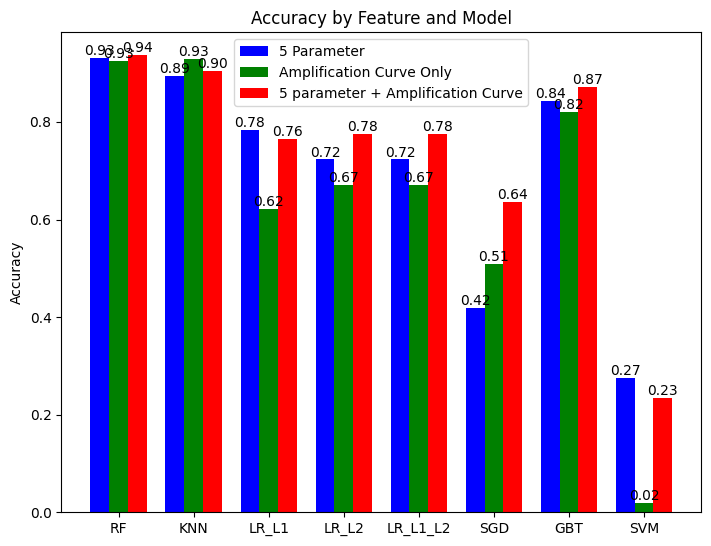

In [47]:
import matplotlib.pyplot as plt
import numpy as np

data = [
    [rf_acc, knn_acc, sgd_acc, LR_L2_acc, LR_L1_L2_acc, SGD_acc, GBT_acc, SVM_acc],
    [rf_acc_ac, knn_acc_ac, sgd_acc_ac, LR_L2_acc_ac, LR_L1_L2_acc_ac, SGD_acc_ac, GBT_acc_ac, SVM_acc_ac],
    [rf_acc_all, knn_acc_all, sgd_acc_all, LR_L2_acc_all, LR_L1_L2_acc_all, SGD_acc_all, GBT_acc_all, SVM_acc_all]
]

ind = np.arange(8)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bar_width = 0.25

bar1 = ax.bar(ind, data[0], color='b', width=bar_width)
bar2 = ax.bar(ind + bar_width, data[1], color='g', width=bar_width)
bar3 = ax.bar(ind + 2 * bar_width, data[2], color='r', width=bar_width)

ax.set_xlabel('Machine Learning Algorithms')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Feature and Model')

ax.set_xticks(ind + bar_width)
ax.set_xticklabels(('RF', 'KNN', 'LR_L1', 'LR_L2', 'LR_L1_L2', 'SGD', 'GBT', 'SVM'))

ax.legend((bar1[0], bar2[0], bar3[0]), ('5 Parameter', 'Amplification Curve Only', '5 parameter + Amplification Curve'))

# Add numbers on each bar
for bar_group in [bar1, bar2, bar3]:
    for bar in bar_group:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height,
                '%.2f' % height, ha='center', va='bottom')

plt.show()
